Section 1: Defining the Questions

In preparation for this analysis, our group wanted to investigate 4 key questions that related to the Heart Disease dataset. We have listed them below:
1. Which health related variables are most predictive of heart disease?
2. How accurately can we classify individuals as at risk or not at risk using machine learning?
3. How do different models (Logistic Regression, Decision Trees, Random Forests) compare in performance?
4. What are the trade-offs between model complexity and interpretability?

Section 2: Data Collection

<div style="display: flex; justify-content: space-between;">
  <div style="width: 45%;">
    <p>Once the research question had been clearly defined, we moved onto the data collection process. We are utilizing an existing dataset called <strong>“Heart Disease Prediction”</strong> sourced from Kaggle. This dataset includes a wide range of health-related variables, which are critical in understanding and predicting the presence of heart disease. These variables include:</p>
    <ul>
      <li>Age</li>
      <li>Sex</li>
      <li>Chest pain type (4 types)</li>
      <ul>
        <li>Type 1: Typical Angina</li>
        <li>Type 2: Atypical Angina</li>
        <li>Type 3: Non-anginal Pain</li>
        <li>Type 4: Asymptomatic</li>
      </ul>
      <li>Resting blood pressure</li>
      <li>Cholesterol levels</li>
      <li>FBS over 120 – Indicates whether the patient’s fasting blood sugar exceeds 120 mg/dl</li>
      <li>Resting electrocardiographic results – 0 = normal, 1 = mild abnormalities, 2 = more serious issues, such as possible heart damage</li>
    </ul>
  </div>
  
  <div style="width: 45%;">
    <ul>
      <li>Maximum heart rate achieved</li>
      <li>Exercise-induced angina – Indicates if the patient experienced chest pain during exercise</li>
      <li>ST depression (Oldpeak) – A drop in the ST segment on an ECG during exercise. The ST segment represents the time between the end of heart muscle contraction and the start of relaxation. A depression in this segment can indicate ischemia (reduced blood flow to the heart).</li>
      <li>Slope of the peak exercise ST segment – Upsloping, Flat, Downsloping</li>
      <li>Number of major vessels colored by fluoroscopy – Ranges from 0 to 3</li>
      <li>Thallium stress test results – 0 = normal, 1 = fixed defect, 2 = reversible defect</li>
      <li>Target variable – Heart Disease (Presence or Absence)</li>
    </ul>
    <p>Additionally, we made some changes to the variable names to make them more logical and intuitive. For example, we renamed certain columns to reflect their meaning more clearly, such as ca to num_major_ves</p>
    <p>By leveraging this dataset, we can build and train predictive models to analyze patterns and relationships between medical features and heart disease outcomes, thereby gaining insights without the need for new data collection.</p>
  </div>
</div>


Section 3: Data Cleaning and Preparation

In [ ]:
import kagglehub
import pandas as pd

In [ ]:

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print("Path to dataset files:", path)
try:
  df = pd.read_csv(path + '/heart.csv')
  print("Original column names:")
  print(df.head())

except FileNotFoundError:
  print(f"Error: File not found at {path + '/heart.csv'}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

df = df.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'rest_blood_pressure',
    'restecg': 'rest_ecg',
    'fbs': 'fast_blood_sugar',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'ca': 'num_major_ves',
    'thal': 'thallium_stress_test'
})

print("Renamed column names:")
print(df.head())



100%|██████████| 6.18k/6.18k [00:00<00:00, 10.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2
Original column names:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Renamed column names:
   age  sex  chest_pain  rest_blood_pressure  chol  fast_blood_sugar  \
0   52    1           0                  125   212                 0   
1   53    1           0                  140   203                 1   


In [ ]:
# Data Description
print("\nFirst five rows:")
print(df.head())
print("\nShape: ")
print(df.shape)
print("\nDescription of the data:")
print(df.describe(include='all'))

# Drop missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
df_cleaned = df.dropna(inplace=False)
print("\nShape of the dataframe after dropping rows with missing values:")
print(df_cleaned.shape)


First five rows:
   age  sex  chest_pain  rest_blood_pressure  chol  fast_blood_sugar  \
0   52    1           0                  125   212                 0   
1   53    1           0                  140   203                 1   
2   70    1           0                  145   174                 0   
3   61    1           0                  148   203                 0   
4   62    0           0                  138   294                 1   

   rest_ecg  max_heart_rate  exercise_induced_angina  oldpeak  slope  \
0         1             168                        0      1.0      2   
1         0             155                        1      3.1      0   
2         1             125                        1      2.6      0   
3         1             161                        0      0.0      2   
4         1             106                        0      1.9      1   

   num_major_ves  thallium_stress_test  target  
0              2                     3       0  
1              0  

Section 4: Data Analysis

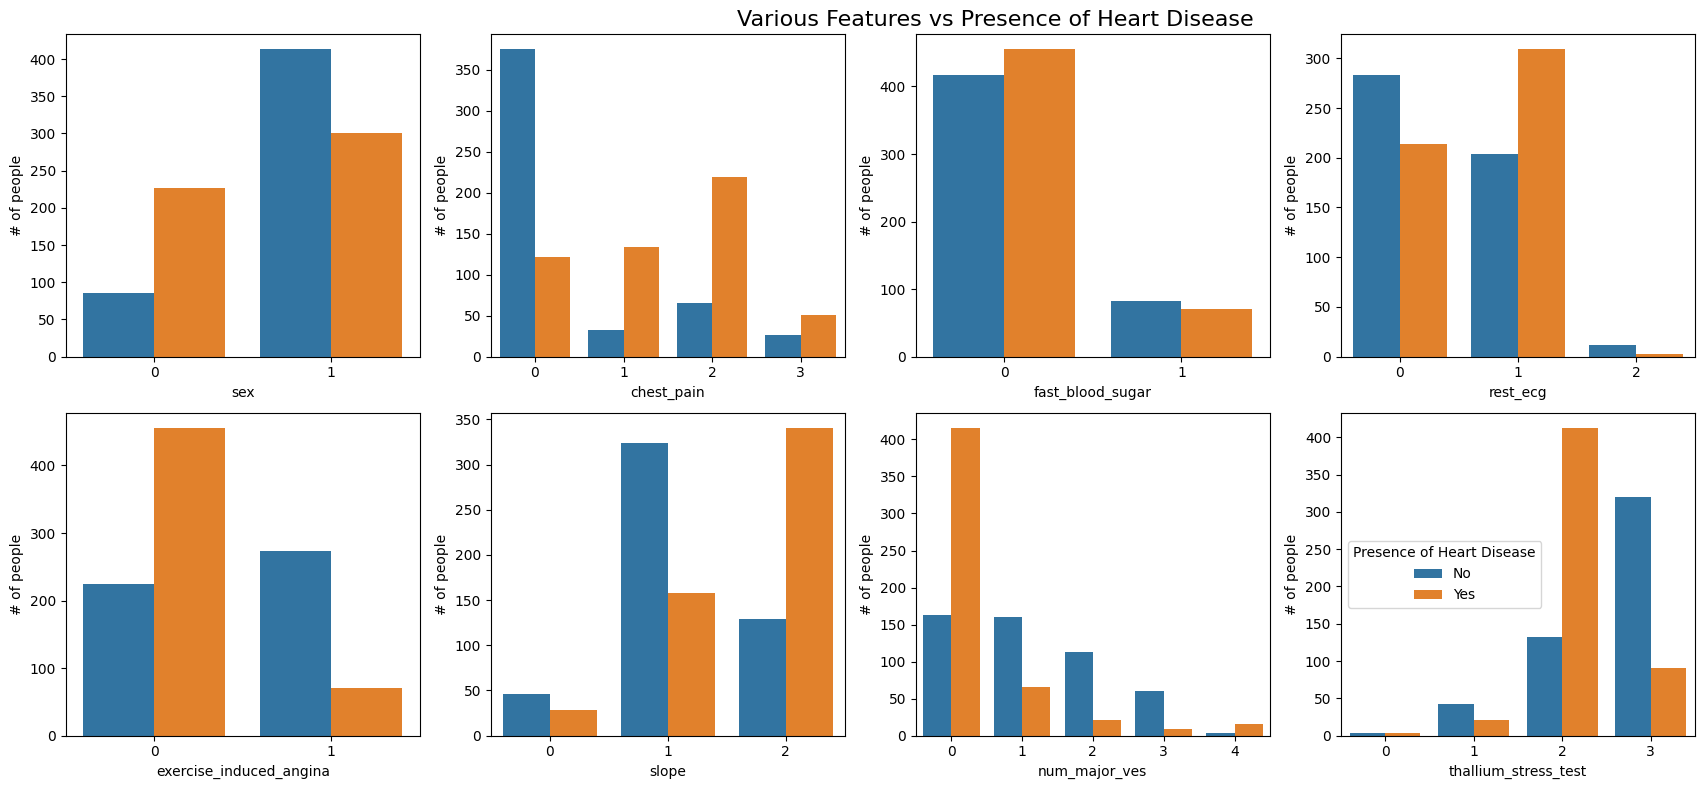

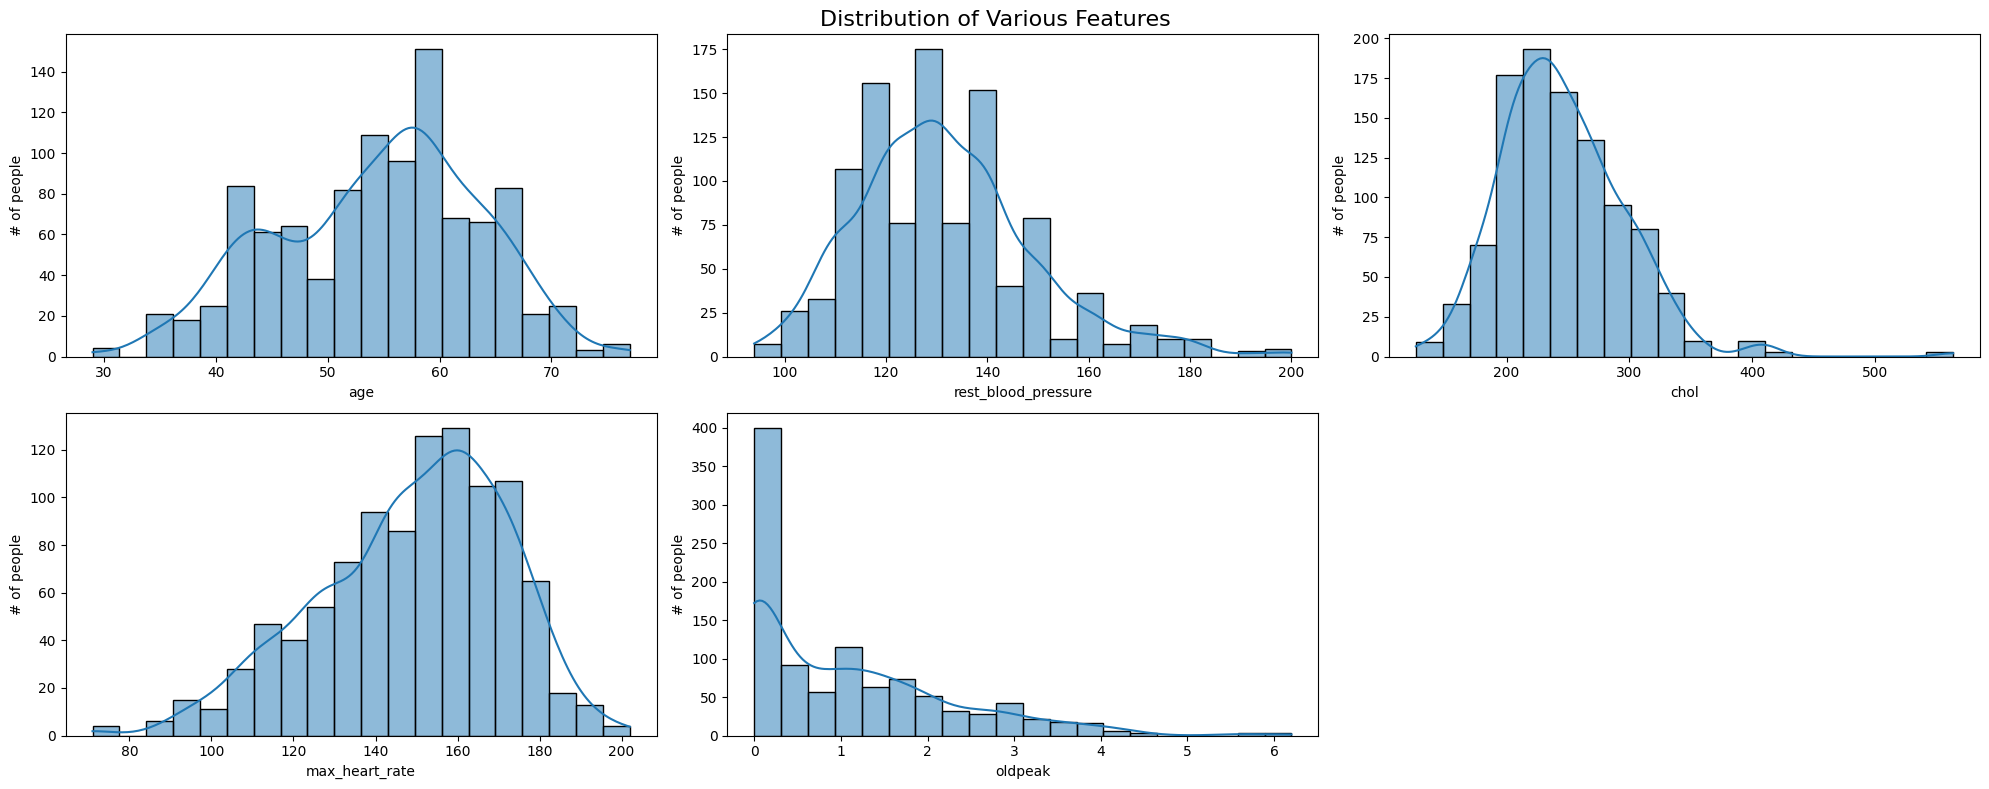

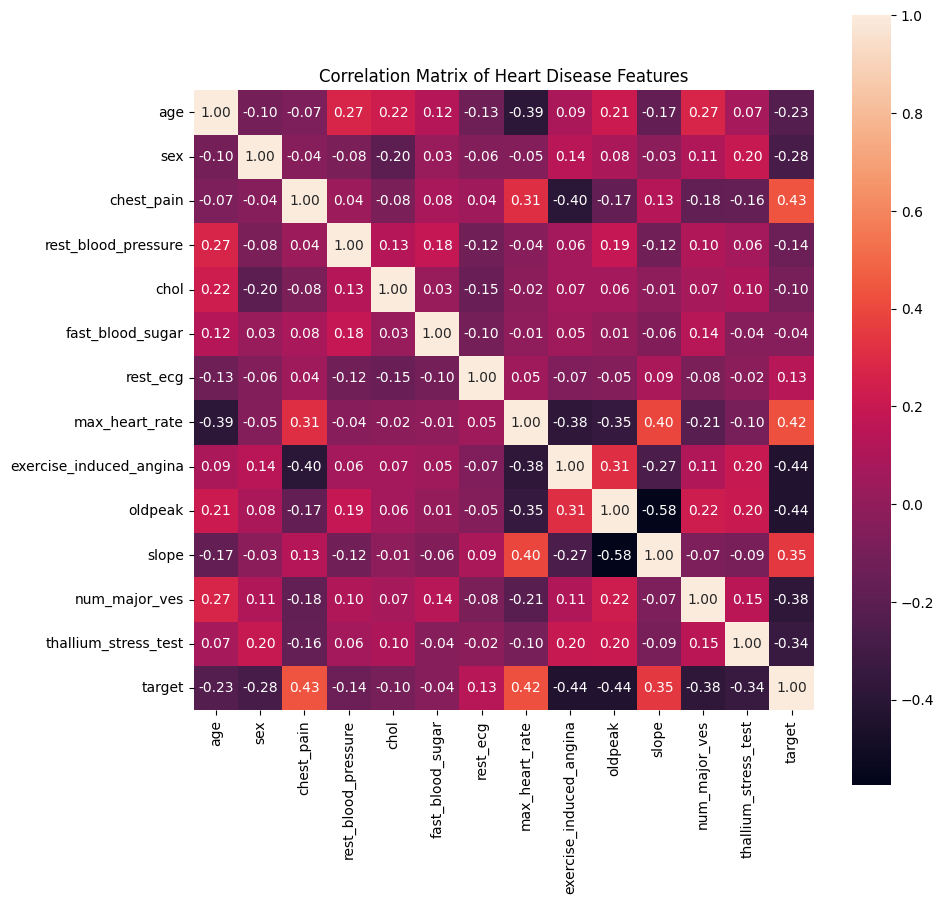

In [ ]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Bar graphs
categorical_features = ['sex', 'chest_pain', 'fast_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'num_major_ves', 'thallium_stress_test']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=df_cleaned, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('# of people')
    axes[i].legend_.remove()
plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.2, top=0.95)
plt.suptitle(f'Various Features vs Presence of Heart Disease', fontsize=16, ha='center')
plt.legend(title='Presence of Heart Disease', labels=['No', 'Yes'], loc='center left')
plt.show()
# Histograms
numerical_features = ['age', 'rest_blood_pressure', 'chol','max_heart_rate', 'oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(df_cleaned[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('# of people')
axes[-1].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle(f'Distribution of Various Features', fontsize=16, ha='center')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cbar=True)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()



Logistic Regression Cross-Validation Scores: [0.88888889 0.79166667 0.8951049  0.7972028  0.85314685]
Mean Accuracy: 0.8452020202020201

Logistic Regression Accuracy (Test Set): 0.8181818181818182
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.78      0.89      0.83       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308


Decision Tree Cross-Validation Scores: [0.93055556 0.96527778 0.97902098 0.98601399 0.97202797]
Mean Accuracy: 0.9665792540792542

Decision Tree Accuracy (Test Set): 0.9805194805194806
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg      

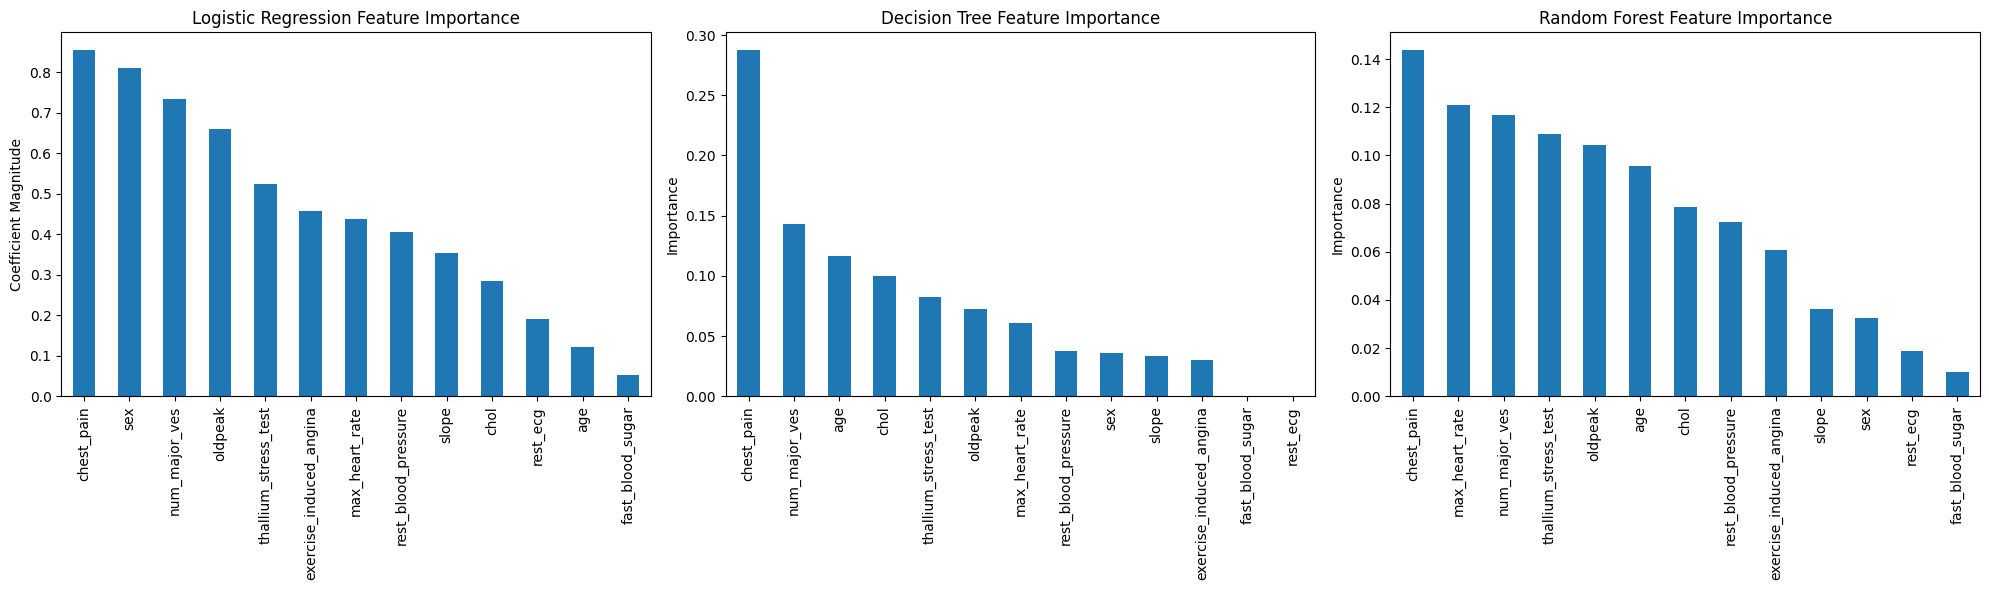

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features for LogReg
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Reg
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
cv_scores_logreg = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_logreg)
print("Mean Accuracy:", cv_scores_logreg.mean())

logreg_model.fit(X_train_scaled, y_train)
logreg_pred = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("\nLogistic Regression Accuracy (Test Set):", logreg_accuracy)
print(classification_report(y_test, logreg_pred))

# 2. Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print("\nDecision Tree Cross-Validation Scores:", cv_scores_dt)
print("Mean Accuracy:", cv_scores_dt.mean())

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy (Test Set):", dt_accuracy)
print(classification_report(y_test, dt_pred))

# 3. Random forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean Accuracy:", cv_scores_rf.mean())

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy (Test Set):", rf_accuracy)
print(classification_report(y_test, rf_pred))

# Comparing models
print("\nModel Comparison (Test Set):")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
feature_names = X.columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# LogReg feature importance
logreg_coef = np.abs(logreg_model.coef_[0])  # Absolute value for interpretability
logreg_importance = pd.Series(logreg_coef, index=feature_names).sort_values(ascending=False)
print("\nLogistic Regression Feature Importance:")
print(logreg_importance)

# Plot
logreg_importance.plot(kind='bar', title='Logistic Regression Feature Importance', ax=axes[0])
axes[0].set_ylabel('Coefficient Magnitude')
# plt.tight_layout()
# plt.show()


# Decision Tree Feature Importance
dt_importance = pd.Series(dt_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nDecision Tree Feature Importance:")
print(dt_importance)

# Plot
dt_importance.plot(kind='bar', title='Decision Tree Feature Importance', ax=axes[1])
axes[1].set_ylabel('Importance')
# plt.tight_layout()
# plt.show()


# Random Forest Feature Importance
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_importance)

# Plot
rf_importance.plot(kind='bar', title='Random Forest Feature Importance', ax=axes[2])
axes[2].set_ylabel('Importance')
plt.tight_layout()
plt.show()

Section 5: Interpretation and Reporting

Before building predictive models, we conducted an exploratory data analysis (EDA) to better understand the distributions, relationships, and key patterns in the Heart Disease dataset. We examined the distribution of continuous features such as age, resting blood pressure, cholesterol levels, maximum heart rate achieved, and ST depression (oldpeak). These distributions revealed that many variables were not perfectly symmetric and that features like cholesterol and oldpeak were right-skewed. Additionally, we explored the relationship between categorical variables and the presence of heart disease. Features such as chest pain type, exercise-induced angina, number of major vessels, and thallium stress test results showed clear differences between individuals with and without heart disease. The correlation matrix further highlighted important relationships, with chest pain, maximum heart rate, and oldpeak showing the strongest correlations with the target variable. This preliminary analysis provided valuable insights into which features might be most predictive and helped guide the selection and interpretation of machine learning models.

To build predictive models, we selected three machine learning models, Logistic Regression, Decision Tree, and Random Forest, to investigate heart disease prediction. Logistic Regression was chosen for its simplicity and interpretability, providing a clear baseline model against which more complex models could be compared. Decision Trees were selected because they offer a visualizable structure that can capture nonlinear relationships and interactions between features. Finally, Random Forests were included as they represent an ensemble method capable of improving prediction accuracy and reducing overfitting by aggregating the predictions of multiple decision trees. Together, these three models allowed us to evaluate a range of complexity, balancing the needs for accuracy, interpretability, and robustness.

To ensure that model evaluation was reliable and not overly dependent on a single train-test split, we implemented a resampling strategy using 5-fold cross-validation for each model. This approach splits the data into five subsets, trains the model on four subsets, and tests it on the remaining subset, repeating this process five times and averaging the results. Cross-validation helps to reduce variability in the performance estimates and provides a more robust measure of a model’s generalization ability. The mean cross-validation accuracies for each model were recorded to guide our model comparison.

Upon evaluating model performance, clear differences emerged between the three approaches. Logistic Regression achieved a cross-validation mean accuracy of 84.5% and a test set accuracy of 81.8%. The Decision Tree model showed a substantial improvement, with a cross-validation mean accuracy of 96.7% and a test set accuracy of 98.1%. Random Forest outperformed both, with a cross-validation mean accuracy of 97.1% and a test set accuracy of 99.0%. Looking deeper into precision, recall, and F1-scores, Logistic Regression demonstrated reasonable performance but had a lower recall for class 0 (no heart disease), indicating it missed more healthy individuals. The Decision Tree model achieved high precision and recall for both classes, suggesting it effectively captured the patterns in the data. Random Forest achieved the highest precision, recall, and F1-scores across both classes, correctly classifying nearly all individuals. These results confirm that, as model complexity increased, predictive performance also improved, with Random Forest providing the most robust classification results.

When comparing feature importance across models, several trends emerged. For Logistic Regression, the most influential variables were chest pain, sex, number of major vessels, and oldpeak (ST depression induced by exercise). In the Decision Tree, chest pain remained the most important predictor, followed by number of major vessels and age. In the Random Forest model, chest pain again ranked highest, followed by maximum heart rate, number of major vessels, and thallium stress test results. Overall, chest pain was consistently the most predictive feature across all three models, reinforcing its critical role in heart disease diagnosis. Other features such as maximum heart rate and thallium stress test results also appeared repeatedly among top predictors. These findings indicate that while the models varied somewhat in how they weighted secondary features, there was strong agreement on the primary predictors of heart disease.

Finally, the investigative questions posed at the beginning of the analysis were thoroughly addressed. First, regarding which health-related variables are most predictive of heart disease, the analysis found that chest pain, number of major vessels observed, maximum heart rate, and thallium stress test results were consistently important across models. Second, in terms of classification accuracy, we demonstrated that machine learning models, particularly tree-based methods, can classify individuals with extremely high accuracy, with Random Forest achieving 99% accuracy on the test set. Third, when comparing different models, we found that performance improved from Logistic Regression to Decision Tree to Random Forest, although this came with increasing model complexity. Finally, concerning the trade-offs between model complexity and interpretability, Logistic Regression offered the highest interpretability but lower predictive performance. Decision Trees provided a good balance of interpretability and accuracy, while Random Forest, although less interpretable, achieved the highest overall performance and is thus recommended for practical application.

Section 6: Contribution Report

In order to ensure each team member contributed to the project equally, we decided to work on the majority of this project together in person. We split up each of the writing sections (Anoushka worked on defining the questions, Landon worked on data collection), while Rohan and Shweta began work on Data Cleaning and Data Analysis. We all the collaborated on implementing the EDA and machine learning technique before analyzing the results and interpreting the model metrics. Collaborating in this way enabled us to solve problems quickly and as they came, rather than disjointedly. We were also all able to understand the project in its entirety rather than just the parts that we individually worked on.